In [43]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [44]:
# Importing neccessary libraries
import pandas as pd 
import numpy as np
from collections import OrderedDict

# Data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

# From importing machine learning model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor


# Libraries for validetion matrix
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
#Loading the data
data = pd.read_excel('Capstone Project.xlsx')

In [46]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [47]:
data_copy1 = data # Creating back up of original the data

In [48]:
data_copy2 = data # Creating back up of original the data

In [49]:
data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [50]:
data.describe() # Viewing the basic desciptive  statistics

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [51]:
data.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [52]:
# Building custom summary function for EDA report
def custom_summry(df):
    
    result = [] #Creating an empty list called result
    
    #Iterating all the columns in the data for studying descriptive stats
    
    for col in df.columns:
        stats = OrderedDict({"Feature Name":col,
                             'Count':df[col].count(),
                            'Minimum':df[col].min(),
                            'Quartile1':df[col].quantile(0.25),
                            'Mean':df[col].mean(),
                            'Median':df[col].median(),
                            'Quartile3':df[col].quantile(0.75),
                            'IQR':(df[col].quantile(0.75)-df[col].quantile(0.25)),
                            'Maximum':df[col].max(),
                            'Variance':df[col].var(),
                            'Standard Deviation':df[col].std(),
                            'Skewness':df[col].skew(),
                            'Kurtosis':df[col].kurt()})
        #custom comment for identifying skeweness
        
 
        if df[col].skew()<-1:
            sk_label = 'highly Negatively Skewed'
        elif -1<= df[col].skew() < -0.5:
            sk_label = 'Moderately Negatively Skewed'
        elif -0.5 <= df[col].skew() <0:
            sk_label = 'Fairly Symmetric(-ve)'
        elif 0 <= df[col].skew() <0.5:
            sk_label = 'Fairly Symmetric(+ve)'
        elif 0.5 <= df[col].skew() <1:
            sk_label = 'Moderately Skewed (+ve)'
        elif df[col].skew() >1:
            sk_label = 'Higly (+ve) Skewed'
        else:
            sk_label = 'error'
        stats['Skeweness Comment'] = sk_label
        
        #custom comment for identifying outliers
        
        up_lim = stats['Quartile3'] + 1.5*stats['IQR']
        low_lim = stats['Quartile1'] - 1.5*stats['IQR']
        if len([x for x in data[col] if x < low_lim or x > up_lim])>0:
            outlier_comment = 'Has outlier'
        else:
            outlier_comment = 'No outlier'
        stats['outlier_comment'] = outlier_comment

        result.append(stats)
    summary_df = pd.DataFrame(data=result)
    return summary_df

In [53]:
custom_summry(data)

,Feature Name,Count,Minimum,Quartile1,Mean,Median,Quartile3,IQR,Maximum,Variance,Standard Deviation,Skewness,Kurtosis,Skeweness Comment,outlier_comment
0,cement,1030,102.00,192.375,281.167864,272.900,350.000,157.625,540.0,10921.580220,104.506364,0.509481,-0.520652,Moderately Skewed (+ve),No outlier
1,slag,1030,0.00,0.000,73.895825,22.000,142.950,142.950,359.4,7444.124812,86.279342,0.800717,-0.508175,Moderately Skewed (+ve),Has outlier
2,ash,1030,0.00,0.000,54.188350,0.000,118.300,118.300,200.1,4095.616541,63.997004,0.537354,-1.328746,Moderately Skewed (+ve),No outlier
3,water,1030,121.80,164.900,181.567282,185.000,192.000,27.100,247.0,456.002651,21.354219,0.074628,0.122082,Fairly Symmetric(+ve),Has outlier
4,superplastic,1030,0.00,0.000,6.204660,6.400,10.200,10.200,32.2,35.686781,5.973841,0.907203,1.411269,Moderately Skewed (+ve),Has outlier
5,coarseagg,1030,801.00,932.000,972.918932,968.000,1029.400,97.400,1145.0,6045.677357,77.753954,-0.040220,-0.599016,Fairly Symmetric(-ve),No outlier
6,fineagg,1030,594.00,730.950,773.580485,779.500,824.000,93.050,992.6,6428.187792,80.175980,-0.253010,-0.102177,Fairly Symmetric(-ve),Has outlier
7,age,1030,1.00,7.000,45.662136,28.000,56.000,49.000,365.0,3990.437729,63.169912,3.269177,12.168989,Higly (+ve) Skewed,Has outlier
8,strength,1030,2.33,23.710,35.817961,34.445,46.135,22.425,82.6,279.081814,16.705742,0.416977,-0.313725,Fairly Symmetric(+ve),Has outlier


In [54]:
# Building a function to treart outliers
def replace_outlier(data,col,method = 'quartile',stratagy = 'median'):
    
    col_data = data[col]
    
    # Using method 1: Quartile
    if method == 'quartile':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        upper_lim = q3 + 1.5*IQR
        lower_lim = q1 - 1.5*IQR
    
    
    # Using method 2: Std. Deviation
    
    elif method == 'standard deviation':
        col_mean = data[col].mean()
        col_sdv = data[col].std()
        limit = 2*col_sdv
        up_lim = col_mean + limit
        lo_lim = col_mean - limit
        
        
    else :
        print('Pass a correct method')
    
    
    # Displaying the outliers
    outliers = data.loc[(col_data < lower_lim) | (col_data > upper_lim), col]
    outliers_percentage = round(len(outliers)/len(data),2)
    if len(outliers) == 0:
        print(f'The {col} has no outliers')
    else:
        print(f'The {col} has {len(outliers)} outliers')
        print('Outlier percentage:',outliers_percentage)
        print(f'The {col} has outlier values:',np.sort(np.array(outliers)))
        display(data.loc[(col_data < lower_lim) | (col_data > upper_lim), col])
        
        
               
    # Replacing outliers
        
    # Using stratagy 1 that is 'median'
        
    if stratagy == 'median':
        data.loc[(col_data < lower_lim) | (col_data > upper_lim), col] = data[col].median()
            
    # Using stratagy  that is 'mean'
        
    elif stratagy == 'mean':
        data.loc[(col_data < lo_lim) | (col_data > up_lim), col] = data[col].mean()
            
    else:
        print('Pass the correct stratagy')
            
    return data    
        

    
    
        
       

In [55]:
# Building ODT plots
# ODT consists of three plots : Box plots(descriptive stats),Distribution with outliers,Distribution with out outliers


In [56]:
def ODT_plots(data,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,20))
    kwargs = {'fontsize' : 20, 'color':'black'}
    
    # Descriptive stats (Box plots)
    
    sns.boxplot(data[col],ax=ax1,orient='v',color='blue')
    ax1.set_title(col+' '+'Boxplot',**kwargs)
    ax1.set_xlabel('boxplot',**kwargs)
    ax1.set_xlabel('values',**kwargs)
    
    
    # Ploting histogram with outliers
    sns.distplot(data[col],ax=ax2,color='red',fit=sci.norm)
    ax2.axvline(data[col].mean(),color='green')
    ax2.axvline(data[col].median(),color='yellow')
    ax2.set_title(col+' '+'Histogram',**kwargs)
    ax2.set_xlabel('Density',**kwargs)
    ax2.set_xlabel('values',**kwargs)
    
    # Ploting histogram without outliers
    # Using the replace outliers function to replace the outliers
    y = replace_outlier(data,col)
    
    
    sns.distplot(y[col],ax=ax3,color='red',fit=sci.norm)
    ax3.axvline(y[col].mean(),color='green')
    ax3.axvline(y[col].median(),color='yellow')
    ax3.set_title(col+' '+'Histogram with out outliers',**kwargs)
    ax3.set_xlabel('Density',**kwargs)
    ax3.set_xlabel('values',**kwargs)
    
    plt.show()

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function 

The cement has no outliers


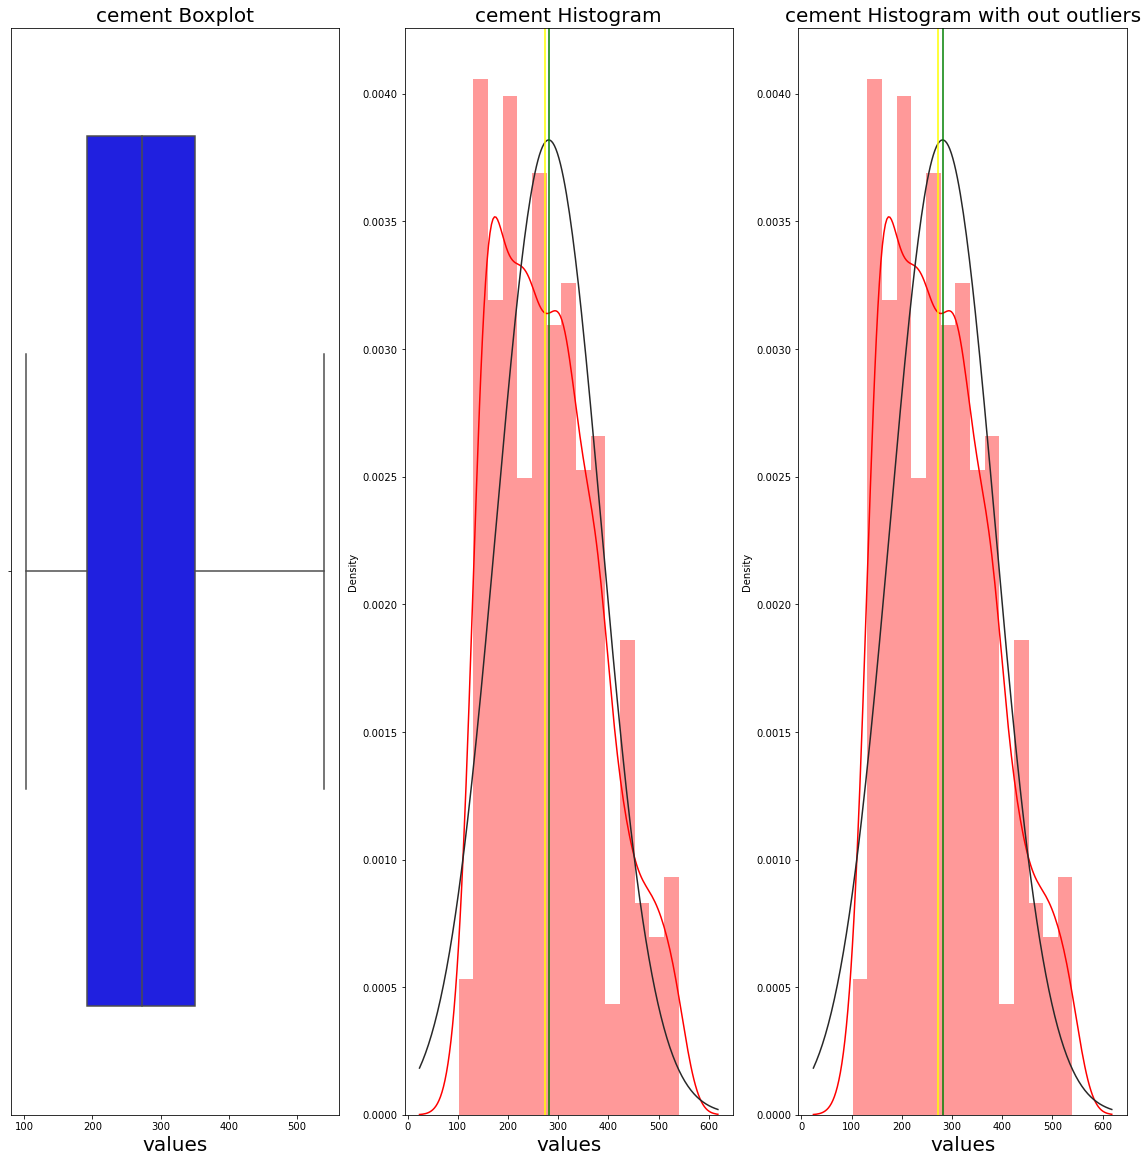

The slag has 2 outliers
Outlier percentage: 0.0
The slag has outlier values: [359.4 359.4]


C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


918    359.4
990    359.4
Name: slag, dtype: float64

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


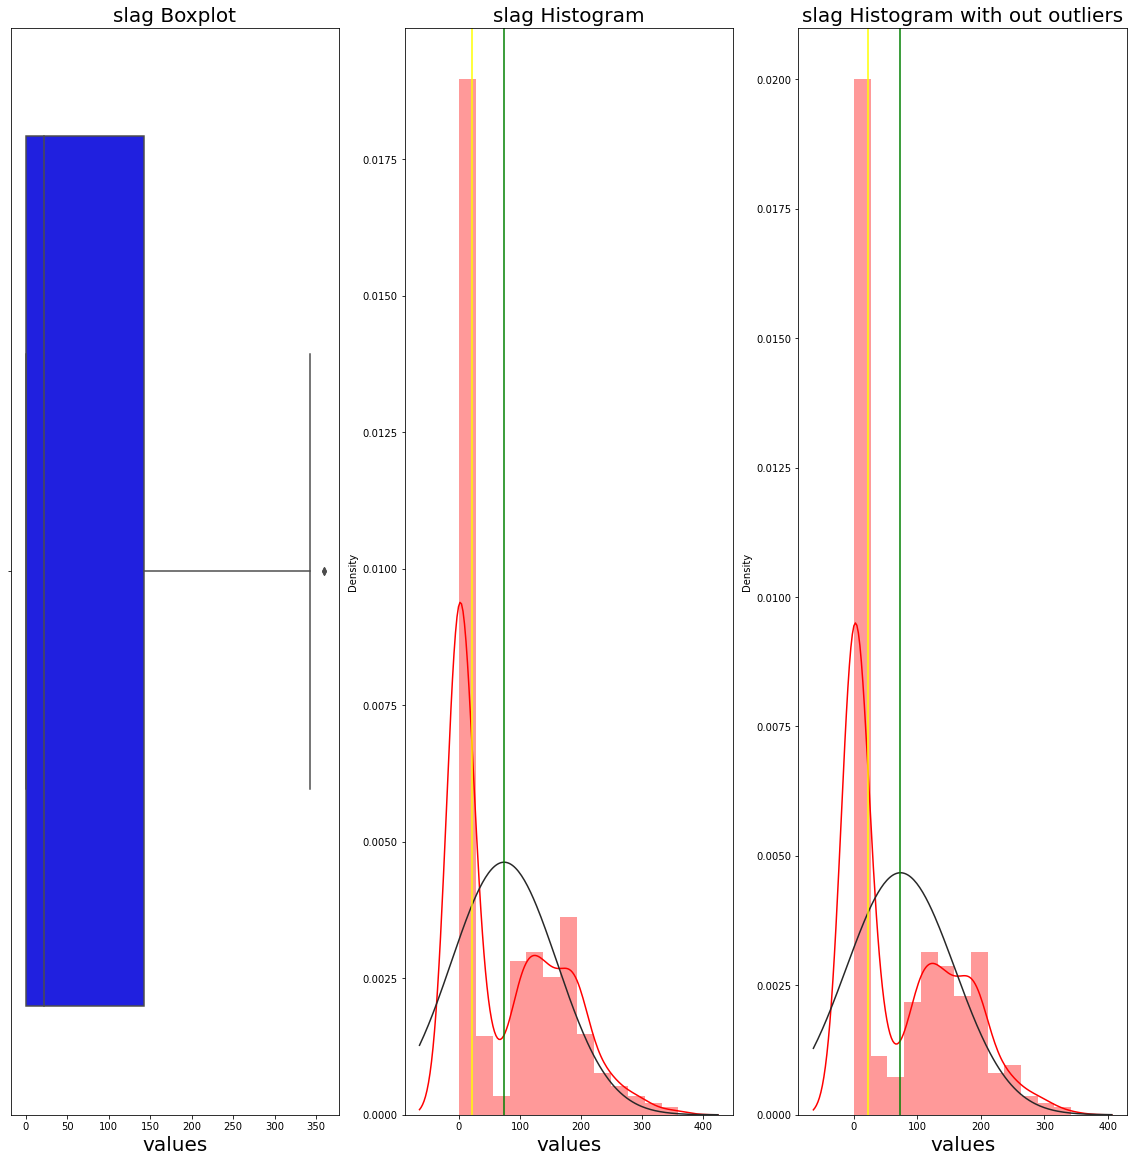

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function 

The ash has no outliers


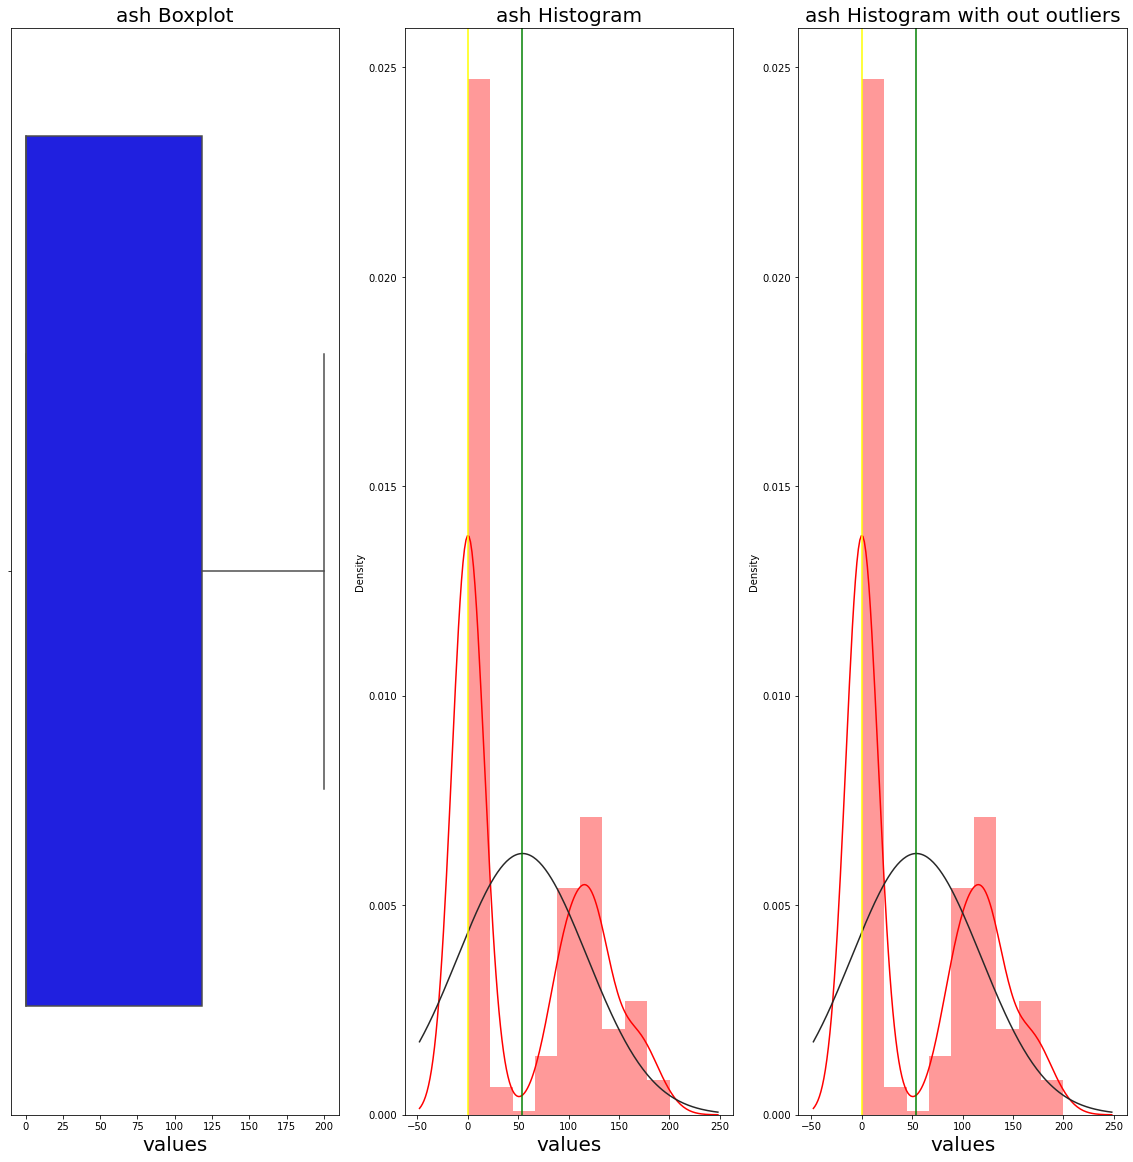

The water has 9 outliers
Outlier percentage: 0.01
The water has outlier values: [121.8 121.8 121.8 121.8 121.8 236.7 237.  246.9 247. ]


C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


66     247.0
263    246.9
432    121.8
462    121.8
587    121.8
740    237.0
789    121.8
826    236.7
914    121.8
Name: water, dtype: float64

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


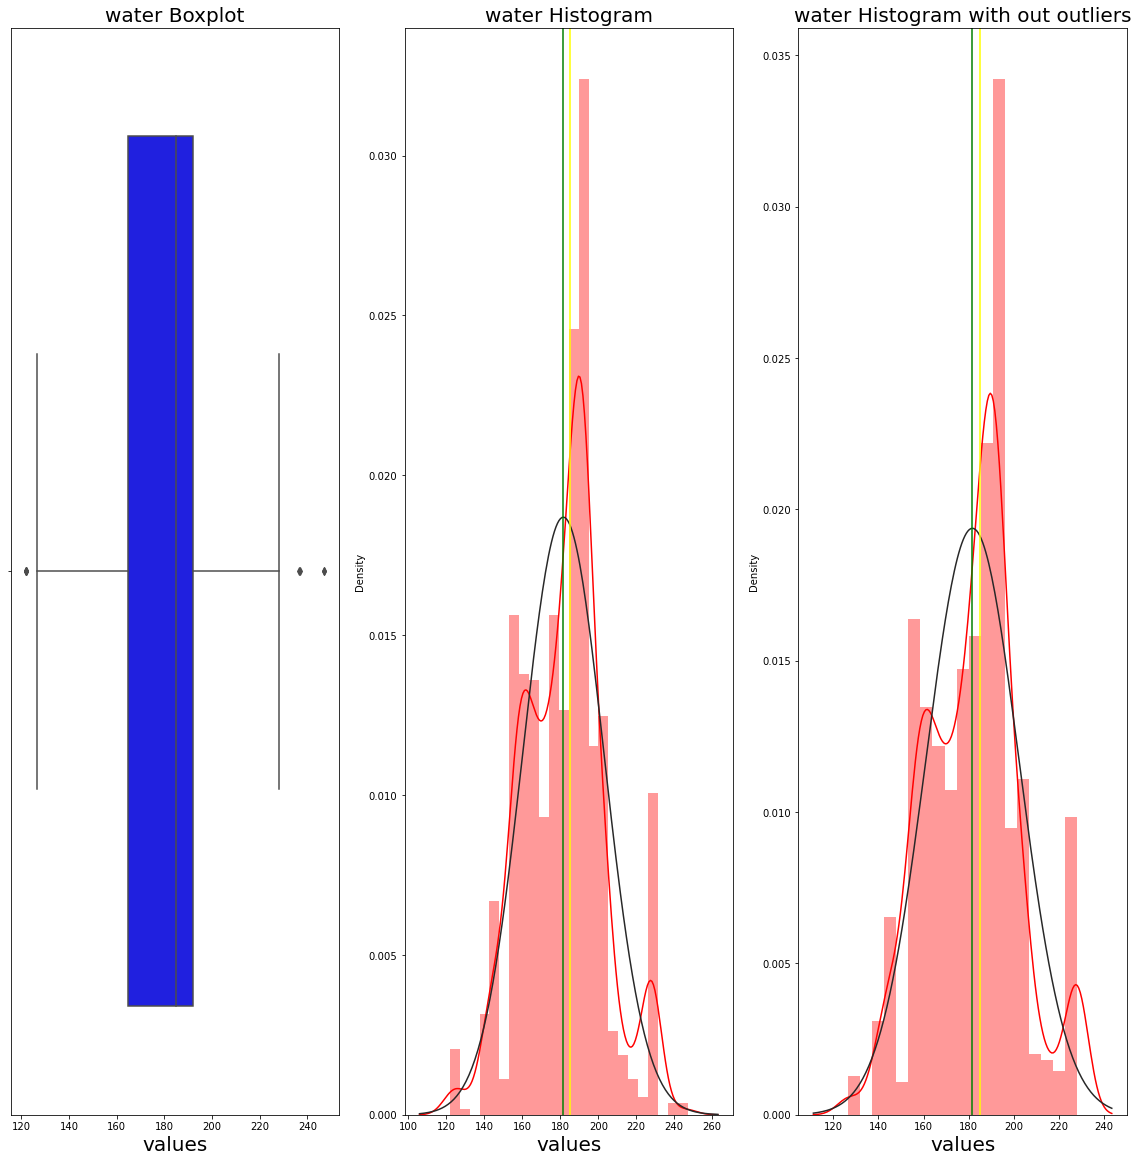

The superplastic has 10 outliers
Outlier percentage: 0.01
The superplastic has outlier values: [28.2 28.2 28.2 28.2 28.2 32.2 32.2 32.2 32.2 32.2]


C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


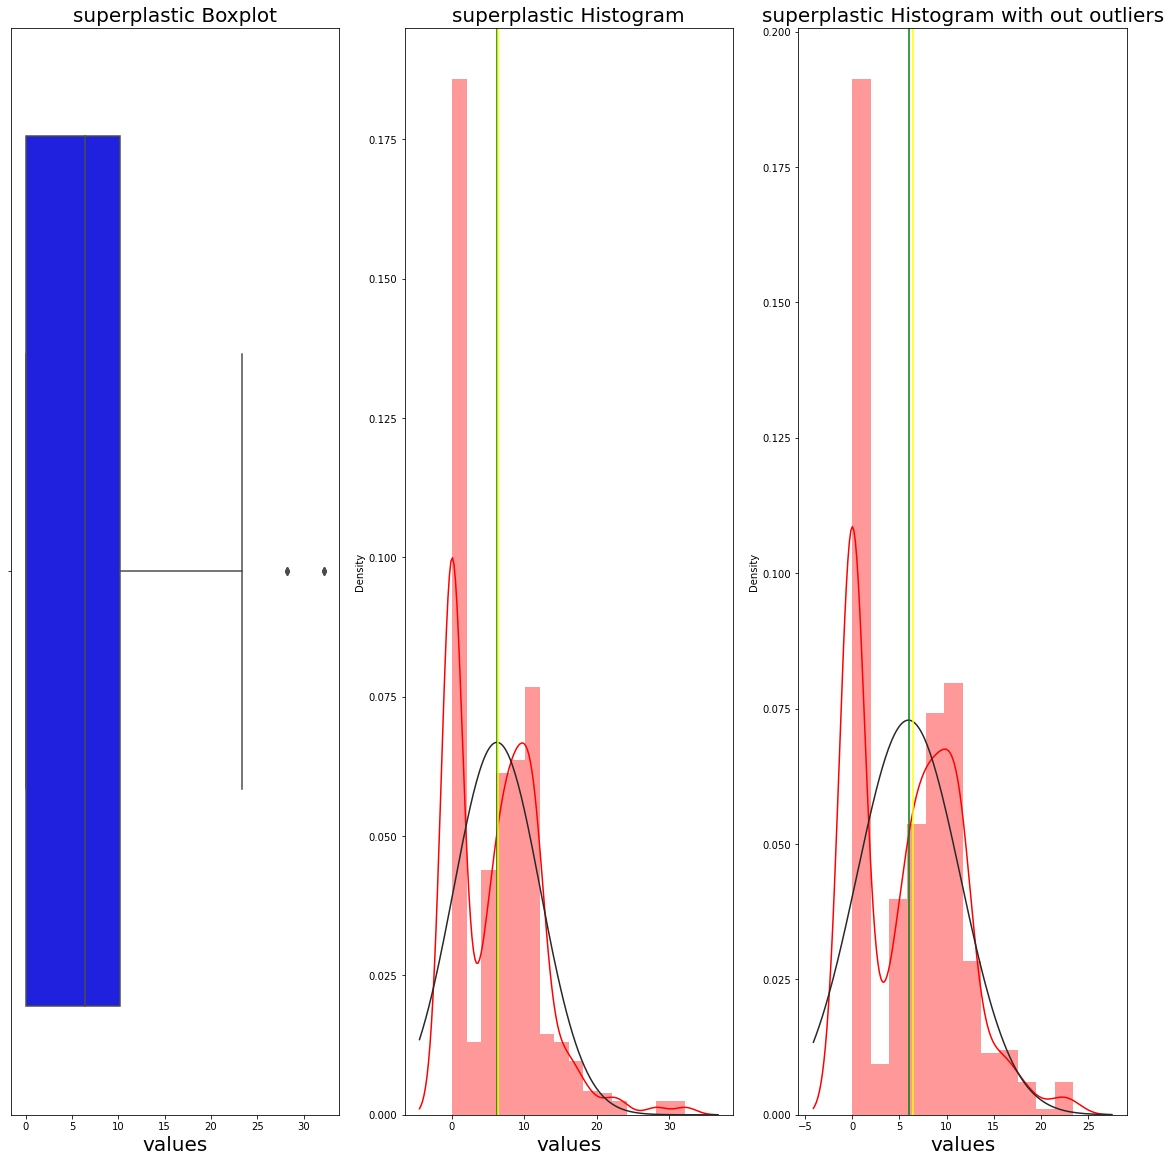

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function 

The coarseagg has no outliers


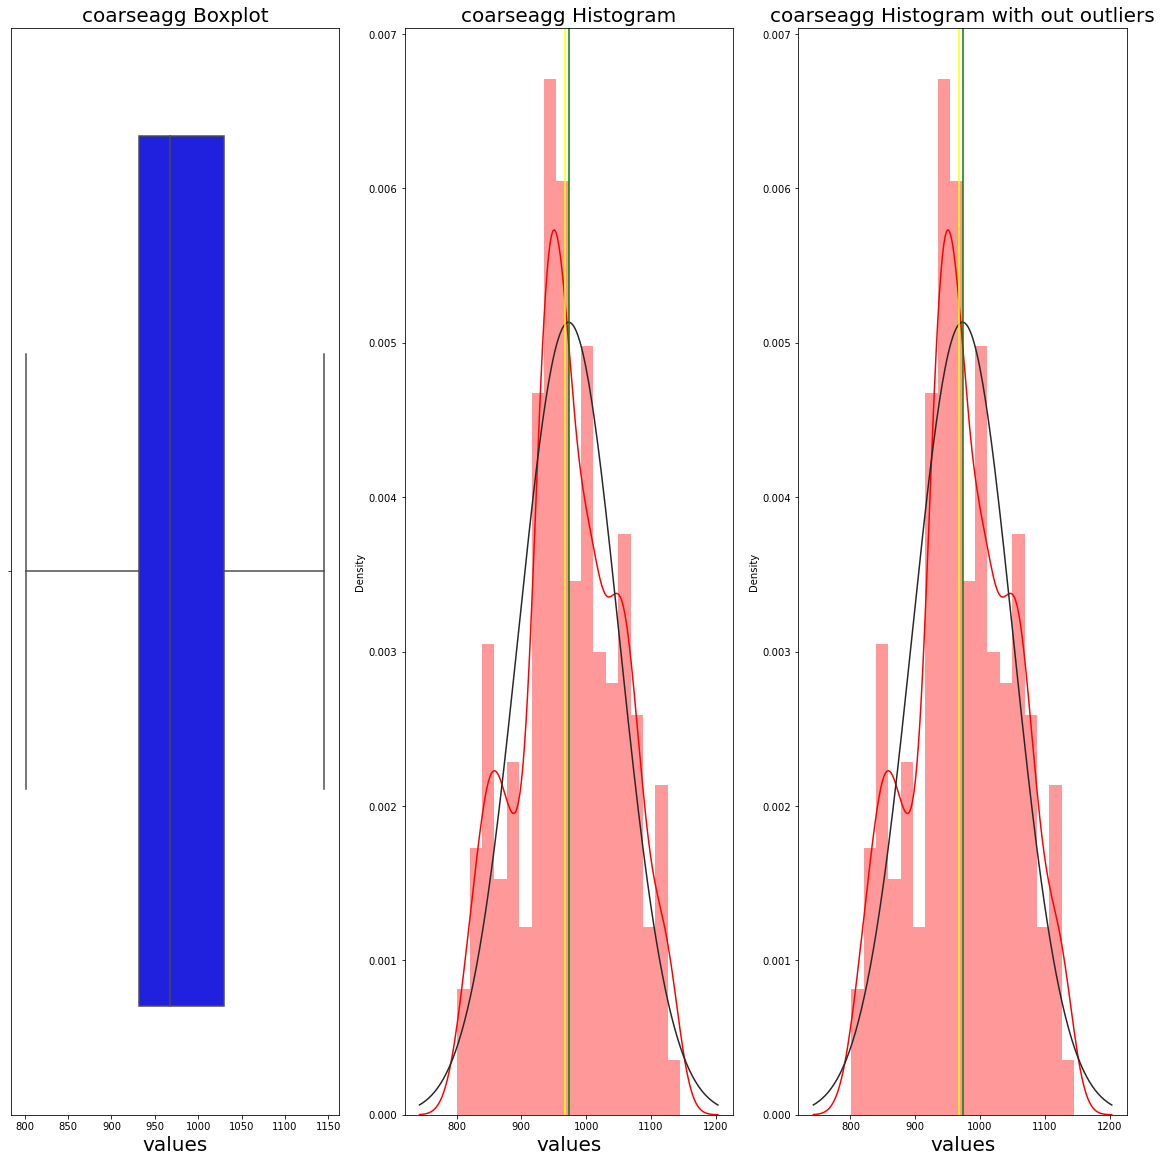

The fineagg has 5 outliers
Outlier percentage: 0.0
The fineagg has outlier values: [992.6 992.6 992.6 992.6 992.6]


C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


129    992.6
447    992.6
504    992.6
584    992.6
857    992.6
Name: fineagg, dtype: float64

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


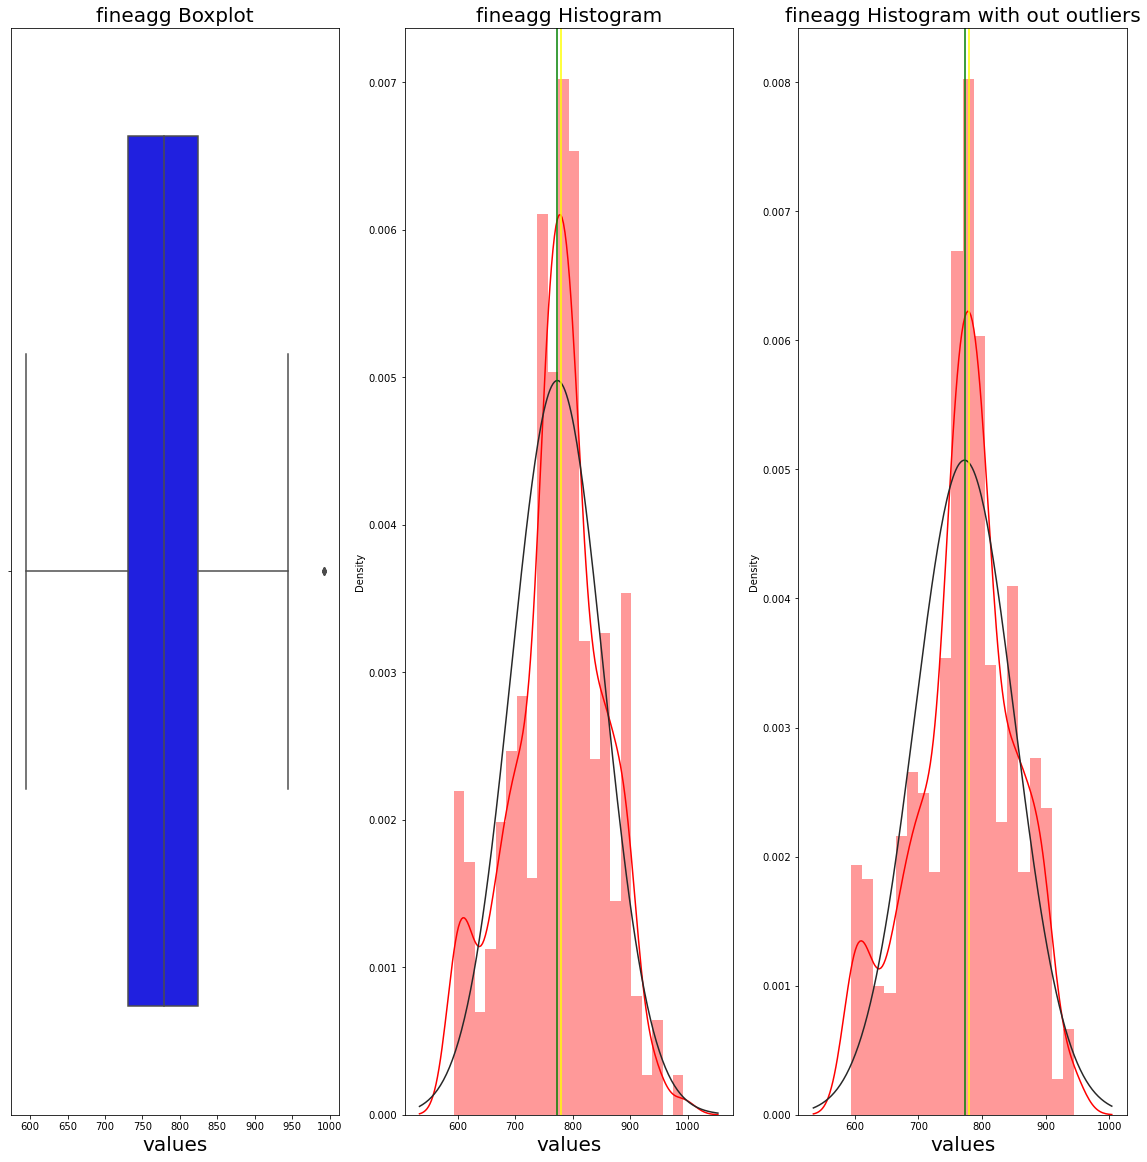

The age has 59 outliers
Outlier percentage: 0.06
The age has outlier values: [180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 270 270 270 270 270 270 270 270 270 270
 270 270 270 360 360 360 360 360 360 365 365 365 365 365 365 365 365 365
 365 365 365 365 365]


C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


51      180
64      365
93      180
99      180
103     180
133     365
144     180
149     270
152     180
157     360
159     365
198     365
199     180
207     180
256     270
262     270
270     270
297     270
302     180
312     180
313     270
323     360
359     180
361     360
370     180
393     365
448     360
465     365
484     365
539     180
570     270
581     180
594     180
601     365
620     180
622     180
623     270
632     270
642     180
696     180
713     365
720     365
721     180
754     365
755     360
776     180
850     270
861     180
878     270
900     180
901     365
919     360
951     270
957     365
971     180
985     180
995     365
1017    180
1028    270
Name: age, dtype: int64

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


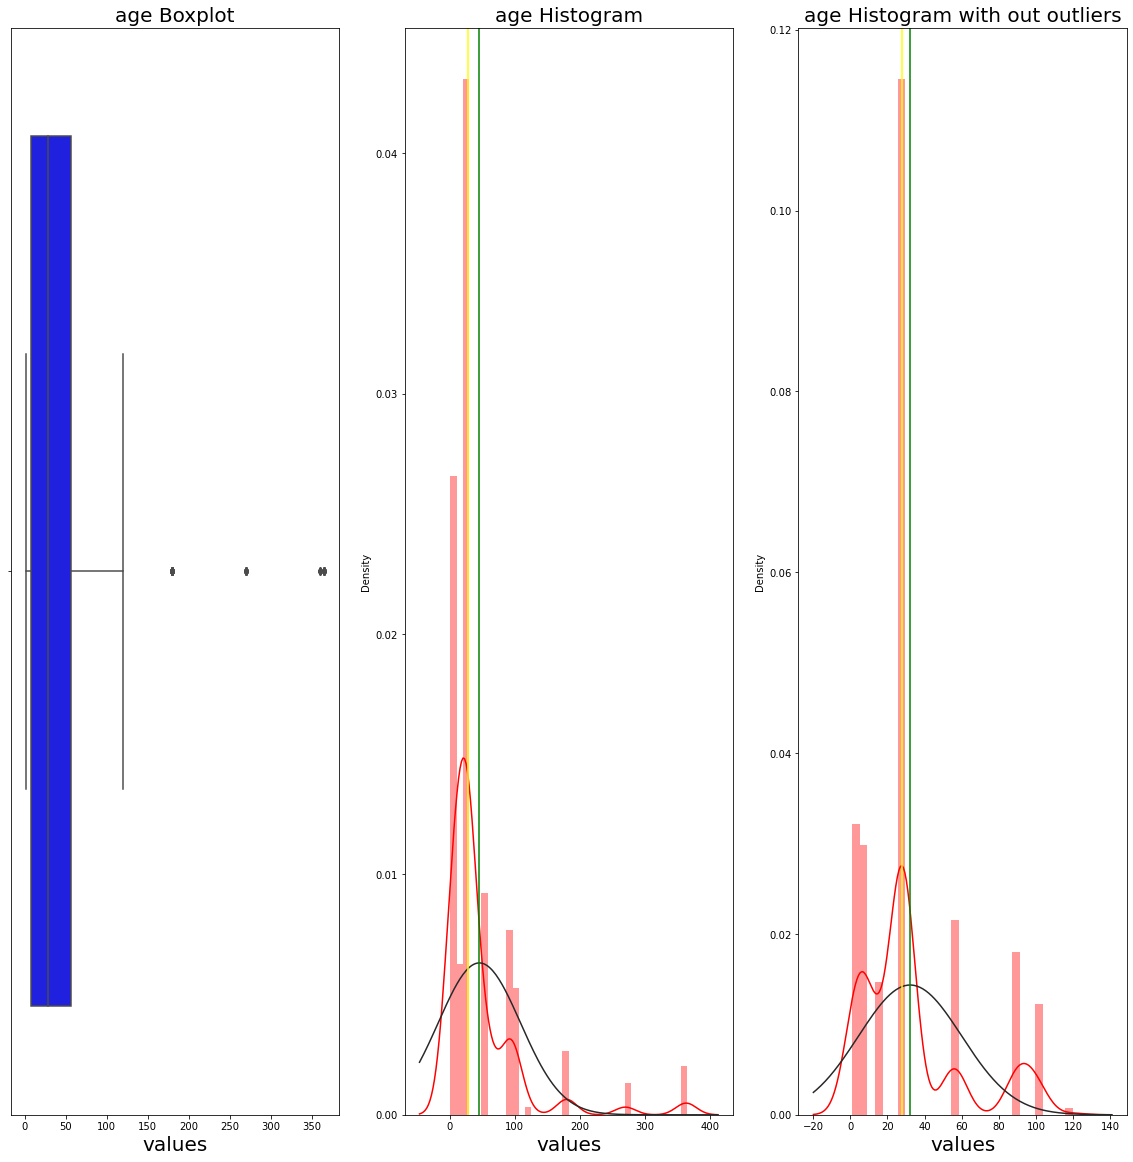

The strength has 4 outliers
Outlier percentage: 0.0
The strength has outlier values: [79.99 80.2  81.75 82.6 ]


C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


192     81.75
732     79.99
950     82.60
1003    80.20
Name: strength, dtype: float64

C:\Users\CHIRAG\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


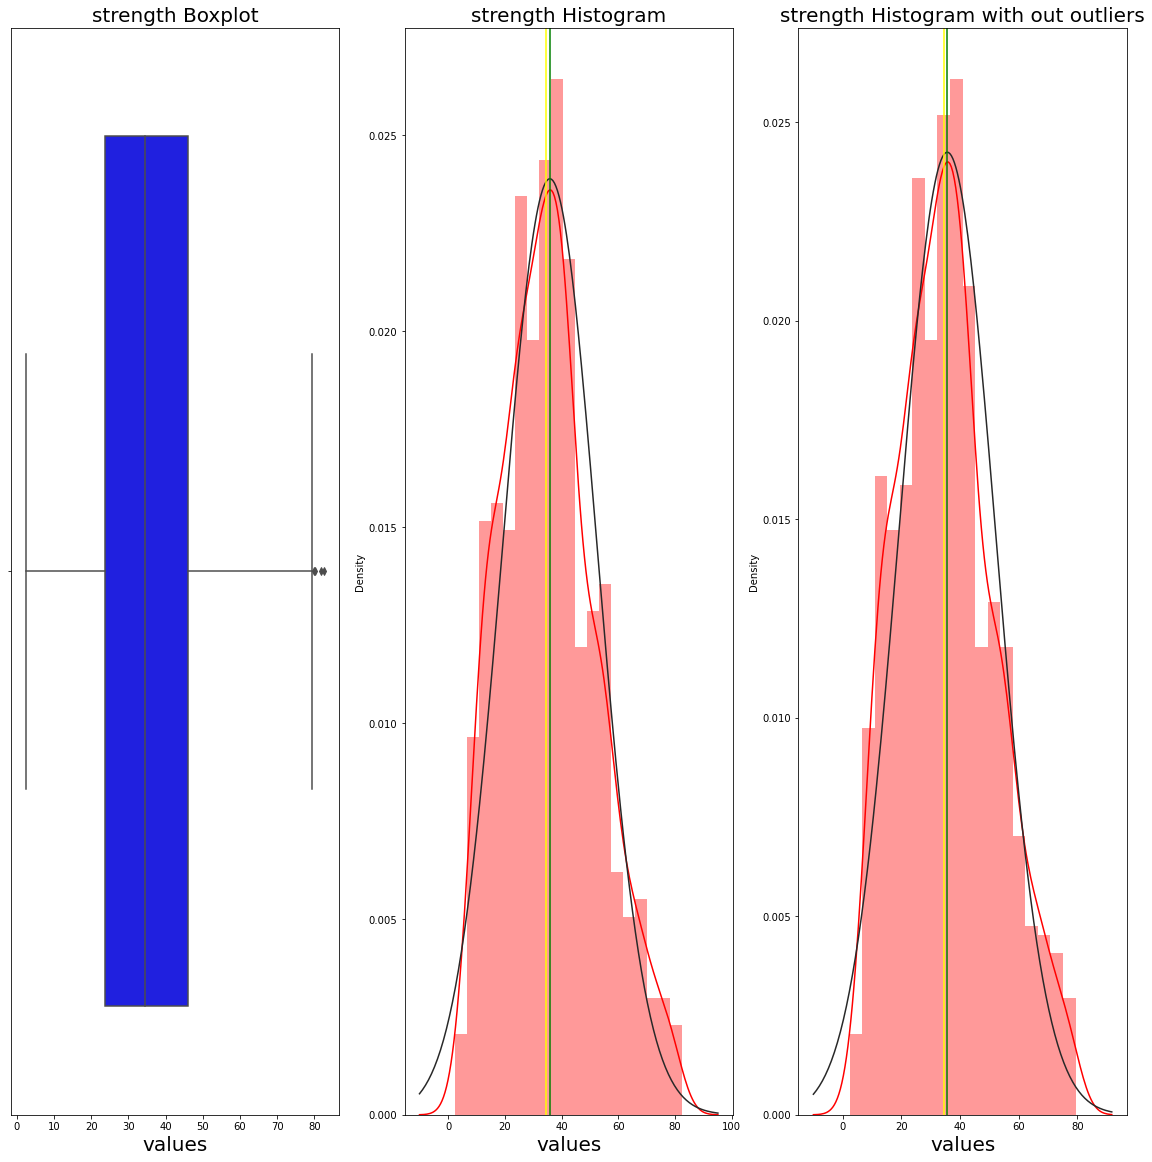

In [57]:
for x in data:
    ODT_plots(data,x)

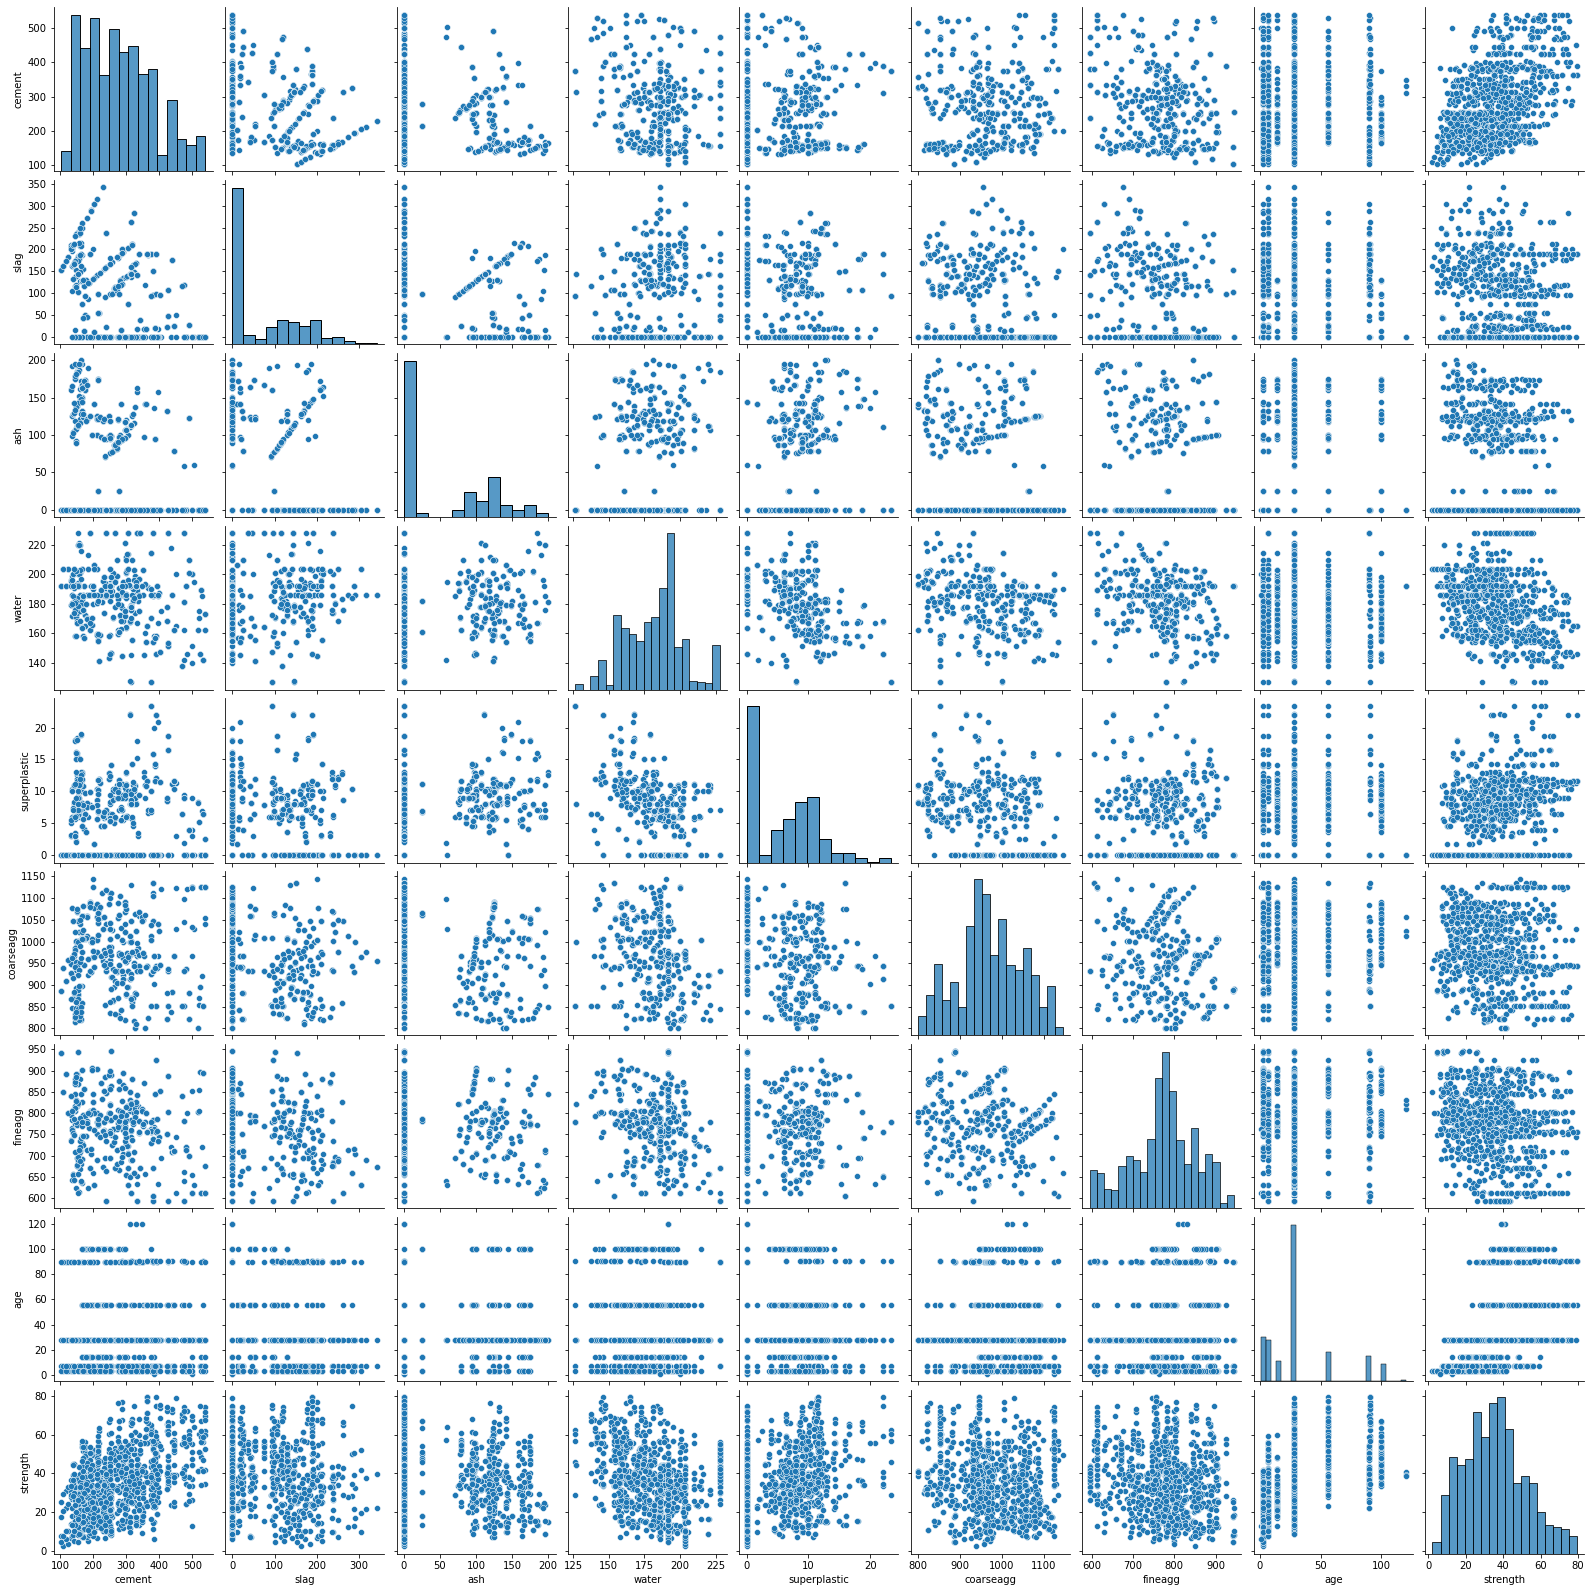

In [58]:
sns.pairplot(data) #graphical representation of correlation

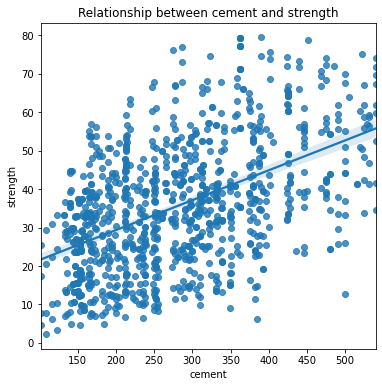

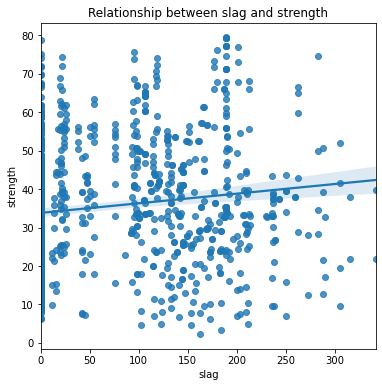

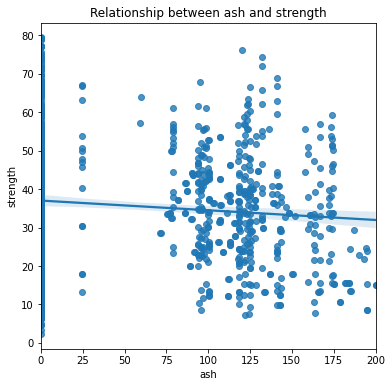

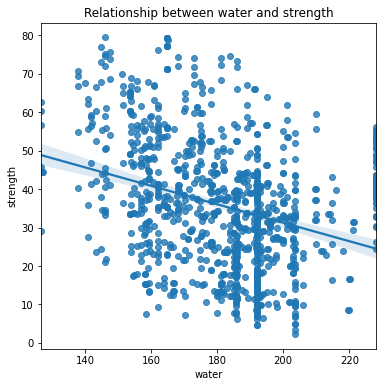

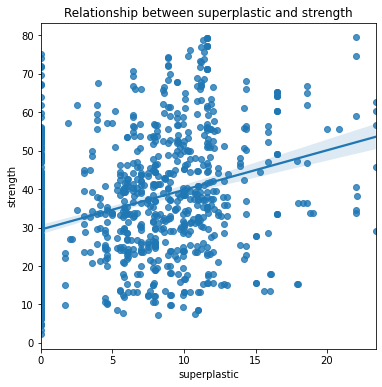

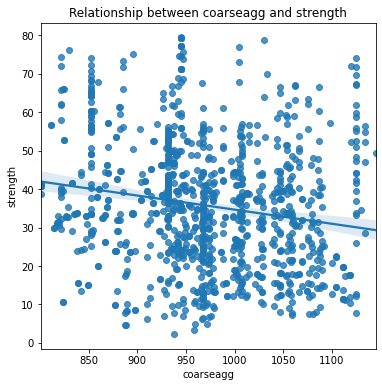

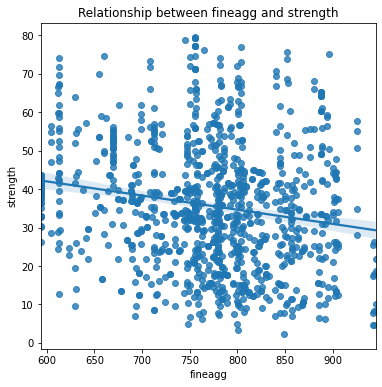

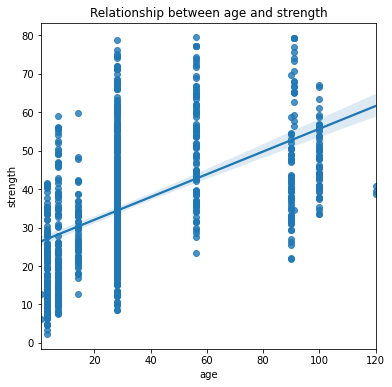

In [59]:
# Multi variate analysis using regression plots
for col in data.columns:
    if col != 'strength':
        f,ax1 = plt.subplots(figsize = (6,6))
        sns.regplot(x = data[col],y=data['strength'],ax=ax1).set_title(f'Relationship between {col} and strength')

<AxesSubplot:>

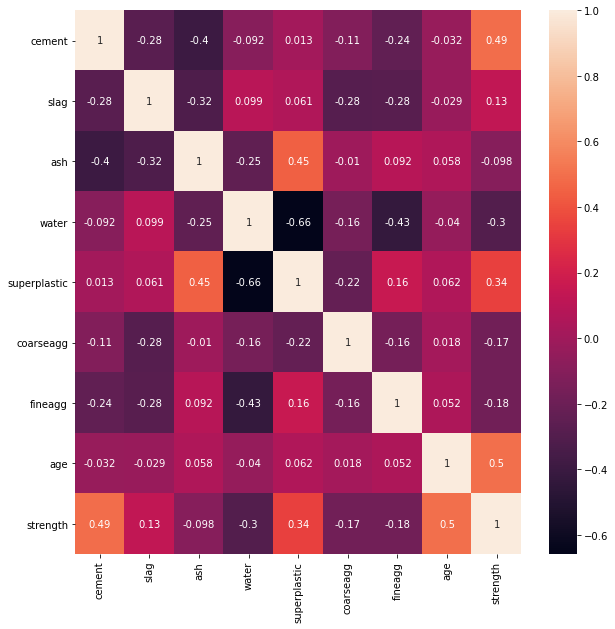

In [60]:
# Plotting Heat Map
f,ax1 = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(),annot=True)

In [61]:
# correlation of each variable with target
def corr_with_target(data,tcol):
    ind_var = data.drop([tcol],axis=1).columns
    corr_result = []
    for col in ind_var:
        corr_result.append(data[tcol].corr(data[col]))
    result = pd.DataFrame([ind_var,corr_result],index=['variables','correlation']).T.sort_values('correlation',ascending = False)
    
    return(result)

In [62]:
corr_with_target(data,'strength')

,variables,correlation
7,age,0.499711
0,cement,0.493518
4,superplastic,0.342633
1,slag,0.129561
2,ash,-0.0979725
5,coarseagg,-0.173234
6,fineagg,-0.176113
3,water,-0.300043


In [63]:
# variance inflation method VIF
# It is the most imp. method to find multicolinearity
# The formula for VIF = 1/(1-R square)
# IF the VIF value is more than 5, we say that data is highly multicolinearity
# Steps involved in VIF
#step1-Regress every indipendent variables with all other independent variables 
#step2- observe the R square values
#step3-calculate the VIF formula

In [64]:
def vif_collinearity(ind_var):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    result = pd.DataFrame()
    result['vif factor'] = [variance_inflation_factor(ind_var.values,i) for i in range(ind_var.shape[1])]
    result['features'] = ind_var.columns
    return(result.sort_values('vif factor',ascending=False))
    

In [65]:
vif_collinearity(data.drop('strength',axis=1))

,vif factor,features
5,86.938582,coarseagg
3,81.963087,water
6,68.664404,fineagg
0,14.291158,cement
4,5.724145,superplastic
2,4.415840,ash
1,3.342314,slag
7,2.368372,age


In [66]:
# Applying PCA

def apply_pca(x):
    
    
    col = []
    ncomp = len(x.columns)
    
    
    from sklearn.preprocessing import StandardScaler
    x = StandardScaler().fit_transform(x)
    
    
    from sklearn.decomposition import PCA
    
    for i in range(1,ncomp):
        pca = PCA(n_components=i)
        p_comp = pca.fit_transform(x)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1]>0.9:
            ncomp = i
            break
            
            
    print('Explain variance ratio is',evr)
    
    
    for j in range(1,ncomp+1):
        col.append('pc'+str(j))
        
        
    result = pd.DataFrame(p_comp,columns=col)
    
    return(result)

In [67]:
transformed_df = apply_pca(data.drop('strength',axis=1))

Explain variance ratio is [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [68]:
transformed_df

,pc1,pc2,pc3,pc4,pc5,pc6
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228
...,...,...,...,...,...,...
1025,-1.743036,0.071059,-1.492203,0.045227,-0.449481,0.968953
1026,-1.079147,-0.572265,3.269799,-1.669125,-0.962953,0.002303
1027,-0.494143,1.276989,0.318398,-0.053272,-0.153787,0.751019
1028,2.688411,-0.236744,0.056551,-0.088955,0.105206,1.368321


In [69]:
transformed_df = transformed_df.join(data['strength'],how='left')

In [70]:
transformed_df

,pc1,pc2,pc3,pc4,pc5,pc6,strength
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110,29.89
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061,23.51
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045,29.22
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548,45.85
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228,18.29
...,...,...,...,...,...,...,...
1025,-1.743036,0.071059,-1.492203,0.045227,-0.449481,0.968953,13.29
1026,-1.079147,-0.572265,3.269799,-1.669125,-0.962953,0.002303,41.30
1027,-0.494143,1.276989,0.318398,-0.053272,-0.153787,0.751019,44.28
1028,2.688411,-0.236744,0.056551,-0.088955,0.105206,1.368321,55.06


In [71]:
# Proceding for model building
#1) Normal model building with train test split
#2) Cross validation
#3) Hyperparameter tuning

In [72]:
def train_and_test_split(data,tcol,test_size=0.3):
    x = data.drop(tcol,axis=1)
    y = data[tcol]
    
    return(train_test_split(x,y,test_size=test_size,random_state=50))

In [73]:
def build_model(mname,m,data,tcol):
    
    x_train,x_test,y_train,y_test = train_and_test_split(data,tcol)
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2score = r2_score(y_test,y_pred)
    
    
    result = [mname,rmse,r2score]
    
    
    
    return(result)

In [74]:
lr = LinearRegression()

In [75]:
build_model('Linear Regression',lr,transformed_df,'strength')

['Linear Regression', 9.171767967837697, 0.7100371520298293]

In [76]:
# Building Multiple models 

def mul_models(data,tcol):
    col = ['Model Name','RMSE','RSquare']
    result = pd.DataFrame(columns=col)
    result.loc[len(result)] = build_model('Linear Regression',LinearRegression(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Lasso',Lasso(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Ridge',Ridge(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Decision Tree Regression',DecisionTreeRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('KNeighborsRegressor',KNeighborsRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('SVM',SVR(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Ada Boost',AdaBoostRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Gradient Boosting',GradientBoostingRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('XGBoost',XGBRegressor(),transformed_df,'strength')
    result.loc[len(result)] = build_model('Random Forest',RandomForestRegressor(),transformed_df,'strength')
    
    return(result)
    

In [77]:
mul_models(transformed_df,'strength')

,Model Name,RMSE,RSquare
0,Linear Regression,9.171768,0.710037
1,Lasso,9.625852,0.680615
2,Ridge,9.173294,0.709941
3,Decision Tree Regression,7.047156,0.828816
4,KNeighborsRegressor,8.209413,0.767694
5,SVM,9.438373,0.692935
6,Ada Boost,8.413965,0.755973
7,Gradient Boosting,6.668950,0.846697
8,XGBoost,6.095381,0.871933
9,Random Forest,5.995227,0.876107


In [78]:
# Building model with cross validation

def Kfold_cv(x,y,fold=10):
    
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_la = cross_val_score(Lasso(),x,y,cv=fold)
    score_ri = cross_val_score(Ridge(),x,y,cv=fold)
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_kn = cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
    score_svr = cross_val_score(SVR(),x,y,cv=fold)
    score_abr = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_gbr = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_xgbr = cross_val_score(XGBRegressor(),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(),x,y,cv=fold)
    
    models = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),RandomForestRegressor()]
    models_names = ['LinearRegression()','Lasso()','Ridge()','DecisionTreeRegressor()','KNeighborsRegressor()','SVR()','AdaBoostRegressor()','GradientBoostingRegressor()','XGBRegressor()','RandomForestRegressor()']
    score = [score_lr,score_la,score_ri,score_dt,score_kn,score_svr,score_abr,score_gbr,score_xgbr,score_rf]
    
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        mnames = models_names[i]
        temp_df = [mnames,score_mean,score_std]
        result.append(temp_df)
        
        
    result_df = pd.DataFrame(result,columns=['Model Names','Score Mean','Score Std'])
    
    return(result_df.sort_values('Score Mean',ascending=False))
        
        

In [79]:
Kfold_cv(transformed_df.drop('strength',axis=1),transformed_df['strength'])

,Model Names,Score Mean,Score Std
8,XGBRegressor(),0.873262,0.036061
9,RandomForestRegressor(),0.866845,0.031489
7,GradientBoostingRegressor(),0.829202,0.050463
4,KNeighborsRegressor(),0.767813,0.055802
3,DecisionTreeRegressor(),0.759765,0.060631
6,AdaBoostRegressor(),0.725962,0.031905
5,SVR(),0.703117,0.042765
2,Ridge(),0.663935,0.059437
0,LinearRegression(),0.663928,0.059476
1,Lasso(),0.649837,0.049887


In [38]:
# Hyperparameter tuning

In [39]:
def tuning_model(x,y,fold=10):
    
    
    #listing the parameters
    param_las = {'alpha':[1e-16,1e-14,1e-12,1e-10,1e-08,1e-06,1e-04,1e-02,1e-00,1,2,4,6,8,10,12,14,16,18,20,30,40,50,60,80,90,100,200,300,400,500,600,750,850,950,1000]}
    param_ri =  {'alpha':[1e-16,1e-14,1e-12,1e-10,1e-08,1e-06,1e-04,1e-02,1e-00,1,2,4,6,8,10,12,14,16,18,20,30,40,50,60,80,90,100,200,300,400,500,600,750,850,950,1000]}
    param_svm = {'kernel':['linear','rbf','sigmoid','poly'],'gamma':['scale','auto']}
    param_rf = {'n_estimators':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200,300,400,500,600,700,800,900,1000]}
    param_kn = {'n_neighbors':[1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200,300,400]}
    param_xg = {'alpha':[0,1],'gamma':[10,20,30,40,50,60,70,80,90,100],'reg_lamda':[0,1]}
    
    
    #Hyperparameter tuning using grid search cv
    
    tune_las = GridSearchCV(Lasso(),param_las,cv=fold)
    tune_ri = GridSearchCV(Ridge(),param_ri,cv=fold)
    tune_svm = GridSearchCV(SVR(),param_svm,cv=fold)
    tune_rf = GridSearchCV(RandomForestRegressor(),param_rf,cv=fold)
    tune_kn = GridSearchCV(KNeighborsRegressor(),param_kn,cv=fold)
    tune_xg = GridSearchCV(XGBRegressor(),param_xg,cv=fold)
    
    
    # Fitting the data
    
    tune_las.fit(x,y)
    tune_ri.fit(x,y)
    tune_svm.fit(x,y)
    tune_rf.fit(x,y)
    tune_kn.fit(x,y)
    tune_xg.fit(x,y)
    
    
    tuned = [tune_las,tune_ri,tune_svm,tune_rf,tune_kn,tune_xg]
    names = ['Lasso','Ridge','SVM','Random Forest','Knn','XGboost']
    
    for i in range(0,len(tuned)):
        print('Model',names[i])
        print('Best value',tuned[i].best_params_)

In [40]:
tuning_model(transformed_df.drop('strength',axis=1),transformed_df['strength'])

C:\Users\CHIRAG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35192.43120044682, tolerance: 25.892099378176912
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHIRAG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37891.401182915266, tolerance: 25.03670756417476
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHIRAG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35908.94292934594, tolerance: 24.58893286581446
  model = cd_fast.enet_coordinate_descent(
C:\Users\CHIRAG\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergence

[20:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bi

In [80]:
def Kfold_cv_hyperparametertuning(x,y,fold=10):
    
    
    score_lr = cross_val_score(LinearRegression(),x,y,cv=fold)
    score_la = cross_val_score(Lasso(alpha=0.01),x,y,cv=fold)
    score_ri = cross_val_score(Ridge(alpha=6),x,y,cv=fold)
    score_dt = cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_kn = cross_val_score(KNeighborsRegressor(n_neighbors=4),x,y,cv=fold)
    score_svr = cross_val_score(SVR(gamma='scale',kernel='rbf'),x,y,cv=fold)
    score_abr = cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_gbr = cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_xgbr = cross_val_score(XGBRegressor(alpha=1,gamma=10,reg_lamda=0),x,y,cv=fold)
    score_rf = cross_val_score(RandomForestRegressor(n_estimators=1000),x,y,cv=fold)
    
    models = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),RandomForestRegressor()]
    models_names = ['LinearRegression()','Lasso()','Ridge()','DecisionTreeRegressor()','KNeighborsRegressor()','SVR()','AdaBoostRegressor()','GradientBoostingRegressor()','XGBRegressor()','RandomForestRegressor()']
    score = [score_lr,score_la,score_ri,score_dt,score_kn,score_svr,score_abr,score_gbr,score_xgbr,score_rf]
    
    
    result = []
    
    for i in range(0,len(models)):
        score_mean = np.mean(score[i])
        score_std = np.std(score[i])
        mnames = models_names[i]
        temp_df = [mnames,score_mean,score_std]
        result.append(temp_df)
        
        
    result_df = pd.DataFrame(result,columns=['Model Names','Score Mean','Score Std'])
    
    return(result_df.sort_values('Score Mean',ascending=False))
        

In [81]:
Kfold_cv_hyperparametertuning(transformed_df.drop('strength',axis=1),transformed_df['strength'])

[20:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { reg_lamda } might not be used.

  This may not be accurate due to some parameters are only used in language bi

,Model Names,Score Mean,Score Std
9,RandomForestRegressor(),0.867625,0.033110
8,XGBRegressor(),0.866822,0.028699
7,GradientBoostingRegressor(),0.829323,0.050008
4,KNeighborsRegressor(),0.771087,0.054489
3,DecisionTreeRegressor(),0.768420,0.055591
6,AdaBoostRegressor(),0.729739,0.037875
5,SVR(),0.703117,0.042765
1,Lasso(),0.663970,0.059370
2,Ridge(),0.663951,0.059242
0,LinearRegression(),0.663928,0.059476
